In [1]:
import numpy as np
from keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
import dpkt
from keras.models import Model
from dpkt.compat import compat_ord
import binascii 
from keras.layers import Dense, Dropout, Flatten,LSTM,Input,Reshape,Embedding,Bidirectional
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import keras
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import os
from keras.models import load_model

Using TensorFlow backend.


In [2]:
malicious = ['147.32.84.180','147.32.84.170','147.32.84.160','147.32.84.150','147.32.84.140','147.32.84.130','10.0.2.15',
'192.168.106.141', '192.168.106.131','172.16.253.130', '172.16.253.131', '172.16.253.129', '172.16.253.240',
'74.78.117.238','158.65.110.24','192.168.3.35', '192.168.3.25', '192.168.3.65', '172.29.0.116','172.29.0.109',
'172.16.253.132', '192.168.248.165','0.37.130.4']


NSIS = ['147.32.84.165','147.32.84.191','147.32.84.192']

IRC = [('192.168.2.112', '131.202.243.84'),('192.168.5.122' ,'198.164.30.2'),('192.168.2.110','192.168.5.122'),
       ('192.168.4.118','192.168.5.122'),('192.168.2.113', '192.168.5.122'),('192.168.1.103' ,'192.168.5.122'),
      ('192.168.4.120' , '192.168.5.122'),('192.168.2.112' , '192.168.2.110'),
    ('192.168.2.112', '192.168.4.120'),
    ('192.168.2.112', '192.168.1.103'),
    ('192.168.2.112','192.168.2.113'),
    ('192.168.2.112' ,'192.168.4.118'),
    ('192.168.2.112' , '192.168.2.109'),
    ('192.168.2.112' , '192.168.2.105'),
    ('192.168.1.105','192.168.5.122')]


IRC2 = ['192.168.2.112', '131.202.243.84','192.168.5.122' ,'198.164.30.2','192.168.2.110' , '192.168.5.122',
       '192.168.4.118','192.168.5.122','192.168.2.113', '192.168.5.122','192.168.1.103' ,'192.168.5.122',
      '192.168.4.120' , '192.168.5.122','192.168.2.112' , '192.168.2.110',
    '192.168.2.112', '192.168.4.120',
    '192.168.2.112', '192.168.1.103',
    '192.168.2.112','192.168.2.113',
    '192.168.2.112' ,'192.168.4.118',
    '192.168.2.112' , '192.168.2.109',
    '192.168.2.112' , '192.168.2.105',
    '192.168.1.105','192.168.5.122']

malicious_ips = [
    "192.168.2.112", "131.202.243.84", "192.168.5.122", "198.164.30.2",
    "192.168.2.110", "192.168.5.122", "192.168.4.118", "192.168.5.122",
    "192.168.2.113", "192.168.5.122", "192.168.1.103", "192.168.5.122",
    "192.168.4.120", "192.168.5.122", "192.168.2.112", "192.168.2.110",
    "192.168.2.112", "192.168.4.120", "192.168.2.112", "192.168.1.103",
    "192.168.2.112", "192.168.2.113", "192.168.2.112", "192.168.4.118",
    "192.168.2.112", "192.168.2.109", "192.168.2.112", "192.168.2.105",
    "192.168.1.105", "192.168.5.122", "147.32.84.180", "147.32.84.170",
    "147.32.84.150", "147.32.84.140", "147.32.84.130", "147.32.84.160",
    "10.0.2.15", "192.168.106.141", "192.168.106.131", "172.16.253.130",
    "172.16.253.131", "172.16.253.129", "172.16.253.240", "74.78.117.238",
    "158.65.110.24", "192.168.3.35", "192.168.3.25", "192.168.3.65",
    "172.29.0.116", "172.29.0.109", "172.16.253.132", "192.168.248.165",
    "10.37.130.4"
]

IRC1 = []
for i in IRC:
    IRC1.append((i[1],i[0]))
IRC.extend(IRC1)


In [3]:
def getType(x):
    if x[0] in malicious_ips or x[1] in malicious_ips:
        return 1
    return 0

def getType1(x):
    if x[0] in malicious or x[1] in malicious or x in IRC:
        return 1
    return 0

# My

In [4]:
train = pd.read_csv('CNNtrain.csv',index_col=0)
train.drop('index',axis=1,inplace=True)

In [3]:
test = pd.read_csv('CNNtest.csv',index_col=0)
test.drop('index',axis=1,inplace=True)

In [17]:
y = train['label'].values

In [4]:
label = test['label'].values

In [24]:
len(train)

200334

In [18]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation = 'relu',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Conv2D(64,(5,5),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='softmax'))
# model.summary()

rmsprop =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decaay=0.0)

adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=adam)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit((train.drop(['label','1024','src','dst'],axis=1)/255).values.reshape(200334,32,32,1), keras.utils.to_categorical(y.reshape(200334,1), num_classes=2), batch_size=50, epochs=10,shuffle=True)

Epoch 1/10
200334/200334 [==============================] - 594s 3ms/step - loss: 0.0801 - acc: 0.9676
Epoch 2/10
200334/200334 [==============================] - 598s 3ms/step - loss: 0.0296 - acc: 0.9893
Epoch 3/10
200334/200334 [==============================] - 598s 3ms/step - loss: 0.0234 - acc: 0.9917
Epoch 4/10
200334/200334 [==============================] - 598s 3ms/step - loss: 0.0230 - acc: 0.9920
Epoch 5/10
200334/200334 [==============================] - 598s 3ms/step - loss: 0.0223 - acc: 0.9922
Epoch 6/10
200334/200334 [==============================] - 598s 3ms/step - loss: 0.0230 - acc: 0.9921
Epoch 7/10
200334/200334 [==============================] - 598s 3ms/step - loss: 0.0219 - acc: 0.9924
Epoch 8/10
200334/200334 [==============================] - 597s 3ms/step - loss: 0.0228 - acc: 0.9922
Epoch 9/10
200334/200334 [==============================] - 599s 3ms/step - loss: 0.0229 - acc: 0.9924
Epoch 10/10
200334/200334 [==============================] - 599s 3ms/ste

In [5]:
model = load_model('finalmy.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [14]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              4195328   
__________

In [7]:
out_my = model.predict_classes((test.drop(['label','1024','src','dst'],axis=1)/255).values.reshape(178395,32,32,1))

In [50]:
print(classification_report(label,out_my))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     59782
           1       0.99      0.98      0.98    118613

   micro avg       0.98      0.98      0.98    178395
   macro avg       0.98      0.98      0.98    178395
weighted avg       0.98      0.98      0.98    178395



In [40]:
print(confusion_matrix(label,out_my))

[[ 58051   1731]
 [  1918 116695]]


In [41]:
1731/(1731+58051)

0.028955203907530695

In [38]:
recall_score(label,out_my)

0.9838297657086491

In [51]:
accuracy_score(label,out_my)


0.979545390846156

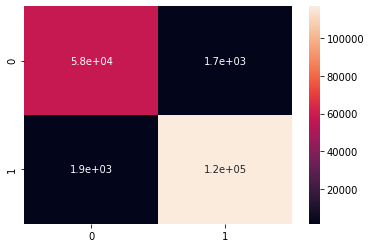

In [52]:
sns.heatmap(confusion_matrix(label,out_my),annot=True)

# Malicious

In [59]:
train = pd.read_csv('CNNtrain.csv',index_col=0)
train.drop('index',axis=1,inplace=True)

In [60]:
y = train['label'].values

In [61]:
random = [i for i in range(12)]
random.extend([j for j in range(26,34)])

In [62]:
d = [str(i) for i in random]

In [63]:
def getrandom(x):
    return np.random.randint(0,256)

In [64]:
for i in d:
    train[i] = train[i].apply(lambda x:getrandom(x))

In [65]:
d = [str(i) for i in range(784)]

In [66]:
train = train[d]

In [57]:
test = test[d]

In [68]:
model1 = Sequential()
model1.add(Conv2D(32,(5,5),activation = 'relu',input_shape=(28,28,1),padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model1.add(Conv2D(64,(5,5),activation = 'relu',padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='tanh'))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(2, activation='softmax'))
model1.summary()

rmsprop =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)

# model.compile(loss='categorical_crossentropy', optimizer=adam)
model1.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.fit((train/255).values.reshape(200334,28,28,1), keras.utils.to_categorical(y.reshape(200334,1), num_classes=2), batch_size=50, epochs=10,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              3212288   
__________

In [57]:
model = load_model('finalmalicious.h5')

In [58]:
out_mal = model.predict_classes((test.drop(['label','1024','src','dst'],axis=1)/255).values.reshape(178395,28,28,1))

In [27]:
print(confusion_matrix(label,out_mal))

[[ 57199   2583]
 [  1912 116701]]


In [71]:
print(classification_report(label,out_mal))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     59782
           1       0.98      0.98      0.98    118613

   micro avg       0.97      0.97      0.97    178395
   macro avg       0.97      0.97      0.97    178395
weighted avg       0.97      0.97      0.97    178395



In [72]:
accuracy_score(label,out_mal)

0.9748031054682026

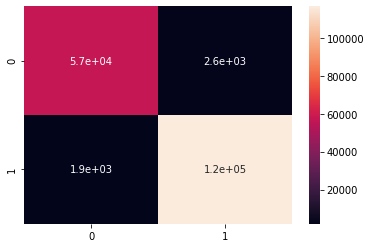

In [73]:
sns.heatmap(confusion_matrix(label,out_mal),annot=True)

# LSTM

In [20]:
rnn_train = pd.read_csv('RNNtrain.csv',index_col=0)
rnn_train.drop('index',axis=1,inplace=True)

In [29]:
rnn_test = pd.read_csv('RNNtest.csv',index_col=0)
rnn_test.drop('index',axis=1,inplace=True)

In [30]:
label = rnn_test['label'].values

In [21]:
y = rnn_train['label'].values

In [31]:
r = [str(i) for i in range(800)]
rnn_train = rnn_train[r]
rnn_test = rnn_test[r]

In [25]:
model = Sequential()

model.add(Bidirectional(LSTM(16,input_shape=(50,16), return_sequences=True)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam') 

rmsprop =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=adam)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit((rnn_train/255).values.reshape(200334,50,16), keras.utils.to_categorical(y.reshape(200334,1), num_classes=2), batch_size=50, epochs=10)


Epoch 1/10
200334/200334 [==============================] - 130s 647us/step - loss: 0.1279 - acc: 0.9488
Epoch 2/10
200334/200334 [==============================] - 132s 658us/step - loss: 0.0694 - acc: 0.9732
Epoch 3/10
200334/200334 [==============================] - 133s 665us/step - loss: 0.0375 - acc: 0.9859
Epoch 4/10
200334/200334 [==============================] - 134s 667us/step - loss: 0.0259 - acc: 0.9903
Epoch 5/10
200334/200334 [==============================] - 134s 669us/step - loss: 0.0191 - acc: 0.9929
Epoch 6/10
200334/200334 [==============================] - 134s 670us/step - loss: 0.0151 - acc: 0.9945
Epoch 7/10
200334/200334 [==============================] - 135s 672us/step - loss: 0.0120 - acc: 0.9957
Epoch 8/10
200334/200334 [==============================] - 136s 677us/step - loss: 0.0099 - acc: 0.9964
Epoch 9/10
200334/200334 [==============================] - 136s 679us/step - loss: 0.0082 - acc: 0.9971
Epoch 10/10
200334/200334 [============================

In [65]:
model = load_model('finallstm.h5')

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total params: 209,410
Trainable params: 209,410
Non-trainable params: 0
_________________________________________________________________


In [66]:
out_lstm = model.predict_classes((rnn_test.drop(['label','800','src','dst'],axis=1)/255).values.reshape(178395,50,16))

In [44]:
print(confusion_matrix(label,out_lstm))

[[ 58572   1210]
 [  2709 115904]]


In [46]:
1210/(1210+58572)

0.02024020608209829

In [45]:
recall_score(label,out_lstm)

0.9771610194498074

In [36]:
print(classification_report(label,out_lstm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     59782
           1       0.99      0.98      0.98    118613

   micro avg       0.98      0.98      0.98    178395
   macro avg       0.97      0.98      0.98    178395
weighted avg       0.98      0.98      0.98    178395



In [38]:
accuracy_score(label,out_lstm)

0.9780318955127666

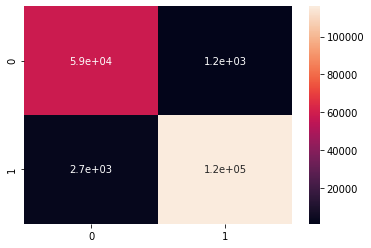

In [39]:
sns.heatmap(confusion_matrix(label,out_lstm),annot=True)

# CNN+RNN

In [4]:
train = pd.read_csv('CNNtrain.csv',index_col=0)
train.drop('index',axis=1,inplace=True)

In [5]:
rnn_train = pd.read_csv('RNNtrain.csv',index_col=0)
rnn_train.drop('index',axis=1,inplace=True)

In [13]:
test = pd.read_csv('CNNtest.csv',index_col=0)
test.drop('index',axis=1,inplace=True)
label = test['label'].values

In [12]:
rnn_test = pd.read_csv('RNNtest.csv',index_col=0)
rnn_test.drop('index',axis=1,inplace=True)

In [6]:
y = train['label'].values

In [7]:
d = [str(i) for i in range(1024)]
r = [str(i) for i in range(800)]

In [8]:
train = train[d]
rnn_train = rnn_train[r]

In [14]:
test = test[d]
rnn_test = rnn_test[r]

In [9]:
input1 = Input(shape=(50,16))
L1_1 = Bidirectional(LSTM(256,return_sequences=True))(input1)
L1_1 = Dropout(0.2)(L1_1)
F1_1 = Flatten()(L1_1)
D1_1 = Dense(256,activation='tanh')(F1_1)
D1_2 = Dense(10,activation='tanh')(D1_1)


input2 = Input(shape=(32,32,1))
C1_1 = Conv2D(32,(5,5),activation = 'relu',padding='same')(input2)
M1_1 = MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2))(C1_1)
C1_2 = Conv2D(64,(5,5),activation = 'relu',padding='same')(M1_1)
M1_2 = MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2))(C1_2)
F2_2 = Flatten()(M1_2)
M1_2 = Dropout(0.5)(F2_2)
D2_1 = Dense(1024, activation='tanh')(M1_2)
D2_2 = Dense(10, activation='tanh')(D2_1)

x = keras.layers.concatenate([D1_2,D2_2])
O = Dense(2,activation='softmax')(x)



model = Model(input=[input1,input2],output=O)


adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=adam)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit([(rnn_train/255).values.reshape(200334,50,16),(train/255).values.reshape(200334,32,32,1)],keras.utils.to_categorical(y.reshape(200334,1), num_classes=2), batch_size=50, epochs=10,shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
200334/200334 [==============================] - 639s 3ms/step - loss: 0.0840 - acc: 0.9661
Epoch 2/10
200334/200334 [==============================] - 665s 3ms/step - loss: 0.0285 - acc: 0.9901
Epoch 3/10
200334/200334 [==============================] - 649s 3ms/step - loss: 0.0204 - acc: 0.9928
Epoch 4/10
200334/200334 [==============================] - 650s 3ms/step - loss: 0.0166 - acc: 0.9944
Epoch 5/10
200334/200334 [==============================] - 635s 3ms/step - loss: 0.0150 - acc: 0.9947
Epoch 6/10
200334/200334 [==============================] - 638s 3ms/step - loss: 0.0149 - acc: 0.9947
Epoch 7/10
200334/200334 [==============================] - 635s 3ms/step - loss: 0.0151 - acc: 0.9949
Epoch 8/10
200334/200334 [==============================] - 763s 4ms/step - loss: 0.0127 - acc: 0.9955
Epoch 9/10
200334/200334 [==============================] - 846s 4ms/step - loss: 0.0117 - acc: 0.9959
Epoch 10/10
200334/200334

In [47]:
model = load_model('finalcnnrnn.h5')

In [49]:
rnn_test.head()

,0,1,2,3,4,5,6,7,8,9,...,794,795,796,797,798,799,800,label,src,dst
0,0,30,73,219,25,195,8,0,39,181,...,0,0,0,0,0,0,"('66.94.236.34', '147.32.84.160')",1,66.94.236.34,147.32.84.160
1,0,30,73,219,25,195,8,0,39,181,...,0,0,0,0,0,0,"('173.192.170.88', '147.32.84.160')",1,173.192.170.88,147.32.84.160
2,0,85,34,175,198,55,0,68,102,252,...,0,0,0,0,0,0,"('87.126.218.182', '172.16.2.12')",0,87.126.218.182,172.16.2.12
3,0,224,177,135,245,148,0,13,96,150,...,0,0,0,0,0,0,"('192.168.4.121', '65.54.189.84')",0,192.168.4.121,65.54.189.84
4,0,30,73,219,25,195,8,0,39,181,...,0,0,0,0,0,0,"('147.32.84.160', '184.173.217.40')",1,147.32.84.160,184.173.217.40


In [50]:
out_cr = model.predict([(rnn_test.drop(['label','800','src','dst'],axis=1)/255).values.reshape(178395,50,16),(test/255).values.reshape(178395,32,32,1)])

In [51]:
out_cr = np.argmax(out_cr,axis=1)

In [21]:
print(classification_report(label,out_cr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     59782
           1       0.99      0.98      0.98    118613

   micro avg       0.98      0.98      0.98    178395
   macro avg       0.98      0.98      0.98    178395
weighted avg       0.98      0.98      0.98    178395



In [26]:
recall_score(label,out_cr)

0.9836274270105301

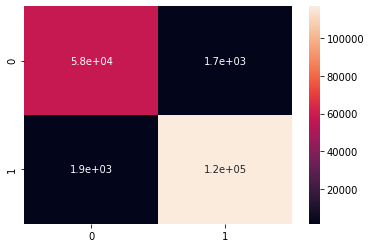

In [28]:
sns.heatmap(confusion_matrix(label,out_cr),annot=True)

In [31]:
print(confusion_matrix(label,out_cr))

[[ 58073   1709]
 [  1942 116671]]


In [32]:
1709/(1709+58073)

0.028587200160583453

# CNN+RNN

# Oversampliing

# My

In [3]:
train = pd.read_csv('CNNtrain.csv',index_col=0)
train.drop('index',axis=1,inplace=True)

In [78]:
test = pd.read_csv('CNNtest.csv',index_col=0)
test.drop('index',axis=1,inplace=True)

In [79]:
label = test['label']

In [4]:
normal = train[train['label'] == 0]

In [5]:
train = pd.concat([train,normal.sample(frac=0.5)])

In [6]:
train.reset_index(drop=True,inplace=True)

In [7]:
y = train['label'].values

In [8]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation = 'relu',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model.add(Conv2D(64,(5,5),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='softmax'))
# model.summary()


adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=adam)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit((train.drop(['label','1024','src','dst'],axis=1)/255).values.reshape(236210,32,32,1), keras.utils.to_categorical(y.reshape(236210,1), num_classes=2), batch_size=50, epochs=10,shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
236210/236210 [==============================] - 712s 3ms/step - loss: 0.0830 - acc: 0.9675
Epoch 2/10
236210/236210 [==============================] - 715s 3ms/step - loss: 0.0307 - acc: 0.9889
Epoch 3/10
236210/236210 [==============================] - 707s 3ms/step - loss: 0.0241 - acc: 0.9919
Epoch 4/10
236210/236210 [==============================] - 796s 3ms/step - loss: 0.0210 - acc: 0.9928
Epoch 5/10
236210/236210 [==============================] - 700s 3ms/step - loss: 0.0210 - acc: 0.9930
Epoch 6/10
236210/236210 [==============================] - 675s 3ms/step - loss: 0.0209 - acc: 0.9933
Epoch 7/10
236210/236210 [==============================] - 681s 3ms/step - loss: 0.0195 - acc: 0.9936
Epoch 8/10
236210/236210 [==================

In [76]:
model = load_model('oversample.h5')

In [77]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,30,73,219,25,195,8,0,39,181,...,0,0,0,0,0,0,0,0,0,0
1,0,30,73,219,25,195,8,0,39,181,...,7,114,161,49,64,0,46,6,100,123
2,0,85,34,175,198,55,0,68,102,252,...,0,0,0,0,0,0,0,0,0,0
3,0,224,177,135,245,148,0,13,96,150,...,52,123,80,24,252,68,228,177,0,0
4,0,30,73,219,25,195,8,0,39,181,...,0,0,0,0,0,0,0,0,0,0


In [80]:
out_my = model.predict_classes((test.drop(['label','1024','src','dst'],axis=1)/255).values.reshape(178395,32,32,1))

In [17]:
print(classification_report(label,out_my))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     59782
           1       0.98      0.98      0.98    118613

   micro avg       0.98      0.98      0.98    178395
   macro avg       0.98      0.98      0.98    178395
weighted avg       0.98      0.98      0.98    178395



In [18]:
print(confusion_matrix(label,out_my))

[[ 57854   1928]
 [  1830 116783]]


In [19]:
accuracy_score(label,out_my)

0.9789343871745284

In [20]:
recall_score(label,out_my)

0.9845716742684192

# Malicious

In [8]:
random = [i for i in range(12)]
random.extend([j for j in range(26,34)])

In [9]:
d = [str(i) for i in random]
def getrandom(x):
    return np.random.randint(0,256)
for i in d:
    train[i] = train[i].apply(lambda x:getrandom(x))
d = [str(i) for i in range(784)]

In [10]:
train = train[d]

In [39]:
i = [str(i) for i in range(784,800)]

In [40]:
test.drop(i,axis=1,inplace=True)

In [16]:
test = test[d]

In [12]:
model1 = Sequential()
model1.add(Conv2D(32,(5,5),activation = 'relu',input_shape=(28,28,1),padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2)))
model1.add(Conv2D(64,(5,5),activation = 'relu',padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='tanh'))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(2, activation='softmax'))
model1.summary()

rmsprop =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)

# model.compile(loss='categorical_crossentropy', optimizer=adam)
model1.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.fit((train/255).values.reshape(236210,28,28,1), keras.utils.to_categorical(y.reshape(236210,1), num_classes=2), batch_size=50, epochs=10,shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)  

In [35]:
model = load_model('overmalicious.h5')

In [42]:
out_mal = model.predict_classes((test.drop(['label','1024','src','dst'],axis=1)/255).values.reshape(178395,28,28,1))

In [20]:
print(classification_report(label,out_mal))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96     59782
           1       0.98      0.98      0.98    118613

   micro avg       0.97      0.97      0.97    178395
   macro avg       0.97      0.97      0.97    178395
weighted avg       0.97      0.97      0.97    178395



In [19]:
recall_score(label,out_mal)


0.9787628674765835

In [22]:
print(confusion_matrix(label,out_mal))

[[ 57703   2079]
 [  2519 116094]]


# LSTM

In [3]:
rnn_train = pd.read_csv('RNNtrain.csv',index_col=0)
rnn_train.drop('index',axis=1,inplace=True)

In [23]:
rnn_test = pd.read_csv('RNNtest.csv',index_col=0)
rnn_test.drop('index',axis=1,inplace=True)


In [6]:
normal = rnn_train[rnn_train['label'] == 0]
rnn_train = pd.concat([rnn_train,normal.sample(frac=0.5)])
rnn_train.reset_index(drop=True,inplace=True)
y = rnn_train['label'].values

In [7]:
r = [str(i) for i in range(800)]
rnn_train = rnn_train[r]


In [15]:
rnn_test = rnn_test[r]

In [9]:
model = Sequential()

model.add(Bidirectional(LSTM(16,input_shape=(50,16), return_sequences=True)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam') 

rmsprop =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=adam)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit((rnn_train/255).values.reshape(236210,50,16), keras.utils.to_categorical(y.reshape(236210,1), num_classes=2), batch_size=50, epochs=10)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
236210/236210 [==============================] - 161s 682us/step - loss: 0.1259 - acc: 0.9502
Epoch 2/10
236210/236210 [==============================] - 164s 693us/step - loss: 0.0543 - acc: 0.9794
Epoch 3/10
236210/236210 [==============================] - 164s 696us/step - loss: 0.0268 - acc: 0.9903
Epoch 4/10
236210/236210 [==============================] - 167s 709us/step - loss: 0.0175 - acc: 0.9936
Epoch 5/10
236210/236210 [==============================] - 167s 708us/step - loss: 0.0132 - acc: 0.9952
Epoch 6/10
236210/236210 [==============================] - 168s 711us/step - loss: 0.0105 - acc: 0.9961
Epoch 7/10
236210/236210 [==============================] - 167s 709us/step - loss: 0.0088 - acc: 0.9969
Epoch 8/10
236210/236210 [====

In [63]:
model = load_model('overlstm.h5')

In [64]:
out_lstm = model.predict_classes((rnn_test.drop(['label','800','src','dst'],axis=1)/255).values.reshape(178395,50,16))

KeyboardInterrupt: 

In [18]:
recall_score(label,out_lstm)


0.9882222016136512

In [19]:
print(confusion_matrix(label,out_lstm))


[[ 57813   1969]
 [  1397 117216]]


In [20]:
print(classification_report(label,out_lstm))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     59782
           1       0.98      0.99      0.99    118613

   micro avg       0.98      0.98      0.98    178395
   macro avg       0.98      0.98      0.98    178395
weighted avg       0.98      0.98      0.98    178395



In [21]:
accuracy_score(label,out_lstm)

0.981131758177079

# RC

In [21]:
rnn_train = pd.read_csv('RNNtrain.csv',index_col=0)
rnn_train.drop('index',axis=1,inplace=True)
normal = rnn_train[rnn_train['label'] == 0]
normal = normal.sample(frac=0.5)
# rnn_train = pd.concat([rnn_train,normal.sample(frac=0.5)])


In [33]:
rnn_train.reset_index(drop=True,inplace=True)

In [25]:
rnn_train = pd.concat([rnn_train,normal])

In [26]:
train = pd.read_csv('CNNtrain.csv',index_col=0)
train.drop('index',axis=1,inplace=True)

In [31]:
y = train['label']

In [27]:
train = pd.concat([train,train.loc[normal.index]])

In [34]:
train.reset_index(drop=True,inplace=True)

In [37]:
ny = rnn_train['label']

In [5]:
d = [str(i) for i in range(1024)]
r = [str(i) for i in range(800)]

In [41]:
train = train[d]
rnn_train = rnn_train[r]

In [3]:
rnn_test = pd.read_csv('RNNtest.csv',index_col=0)
rnn_test.drop('index',axis=1,inplace=True)
test = pd.read_csv('CNNtest.csv',index_col=0)
test.drop('index',axis=1,inplace=True)
label = test['label']

In [6]:
rnn_test = rnn_test[r]
test = test[d]

In [45]:
input1 = Input(shape=(50,16))
L1_1 = Bidirectional(LSTM(256,return_sequences=True))(input1)
L1_1 = Dropout(0.2)(L1_1)
F1_1 = Flatten()(L1_1)
D1_1 = Dense(256,activation='tanh')(F1_1)
D1_2 = Dense(10,activation='tanh')(D1_1)


input2 = Input(shape=(32,32,1))
C1_1 = Conv2D(32,(5,5),activation = 'relu',padding='same')(input2)
M1_1 = MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2,2))(C1_1)
C1_2 = Conv2D(64,(5,5),activation = 'relu',padding='same')(M1_1)
M1_2 = MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2))(C1_2)
F2_2 = Flatten()(M1_2)
M1_2 = Dropout(0.5)(F2_2)
D2_1 = Dense(1024, activation='tanh')(M1_2)
D2_2 = Dense(10, activation='tanh')(D2_1)

x = keras.layers.concatenate([D1_2,D2_2])
O = Dense(2,activation='softmax')(x)



model = Model(input=[input1,input2],output=O)


adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=adam)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit([(rnn_train/255).values.reshape(236210,50,16),(train/255).values.reshape(236210,32,32,1)],keras.utils.to_categorical(y.values.reshape(236210,1), num_classes=2), batch_size=50, epochs=10,shuffle=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


Epoch 1/10
236210/236210 [==============================] - 2069s 9ms/step - loss: 0.0709 - acc: 0.9728
Epoch 2/10
236210/236210 [==============================] - 2035s 9ms/step - loss: 0.0246 - acc: 0.9914
Epoch 3/10
236210/236210 [==============================] - 2037s 9ms/step - loss: 0.0193 - acc: 0.9934
Epoch 4/10
236210/236210 [==============================] - 2035s 9ms/step - loss: 0.0244 - acc: 0.9919
Epoch 5/10
236210/236210 [==============================] - 2033s 9ms/step - loss: 0.0198 - acc: 0.9933
Epoch 6/10
236210/236210 [==============================] - 2029s 9ms/step - loss: 0.0199 - acc: 0.9935
Epoch 7/10
236210/236210 [==============================] - 2029s 9ms/step - loss: 0.0213 - acc: 0.9932
Epoch 8/10
236210/236210 [==============================] - 2029s 9ms/step - loss: 0.0195 - acc: 0.9935
Epoch 9/10
236210/236210 [==============================] - 2029s 9ms/step - loss: 0.0217 - acc: 0.9930
Epoch 10/10
236210/236210 [==============================] - 203

In [8]:
model = load_model('overrc.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [9]:
out_over_cr = model.predict([(rnn_test/255).values.reshape(178395,50,16),(test/255).values.reshape(178395,32,32,1)])

In [10]:
out_over_cr = np.argmax(out_over_cr,axis=1)

In [11]:
recall_score(label,out_over_cr)


0.9827337644271708

In [13]:
print(classification_report(label,out_over_cr))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96     59782
           1       0.98      0.98      0.98    118613

   micro avg       0.97      0.97      0.97    178395
   macro avg       0.97      0.97      0.97    178395
weighted avg       0.97      0.97      0.97    178395



In [15]:
print(confusion_matrix(label,out_over_cr))

[[ 57136   2646]
 [  2048 116565]]


# Analysis

In [9]:
malicious_list = {
'IRC':IRC2,'Neris':['147.32.84.180'],
'RBot' :['147.32.84.170'],
'Menti':['147.32.84.150'],
'Sogou': ['147.32.84.140'],
'Murlo':['147.32.84.130'],
'Virut' :['147.32.84.160'],
'IRCbot_black_hole1':['10.0.2.15'],
'Black_hole_2': ['192.168.106.141'],
'Black_hole_3': ['192.168.106.131'],
'TBot': ['172.16.253.130', '172.16.253.131', '172.16.253.129', '172.16.253.240'],
'Weasel': ['74.78.117.238','158.65.110.24'],
'Zeus' : ['192.168.3.35','192.168.3.25', '192.168.3.65', '172.29.0.116'],
'Osx_trojan': ['172.29.0.109'],
'Zero_access': ['172.16.253.132', '192.168.248.165'],
'Smoke bot': ['10.37.130.4']}

In [8]:
train_distribution = {}
test_distribution = {}
find_distribution = {}
for i in malicious_list:
    test_distribution[i] = 0
    find_distribution[i] = 0
    train_distribution[i] = 0

In [9]:
for label,row in train.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                train_distribution[i] +=1
                continue

In [10]:
train_distribution

{'Black_hole_2': 0,
 'Black_hole_3': 0,
 'IRC': 77143,
 'IRCbot_black_hole1': 0,
 'Menti': 0,
 'Murlo': 0,
 'Neris': 14443,
 'Osx_trojan': 0,
 'RBot': 31526,
 'Smoke bot': 0,
 'Sogou': 0,
 'TBot': 0,
 'Virut': 864,
 'Weasel': 4607,
 'Zero_access': 0,
 'Zeus': 0}

In [11]:
for label,row in test.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                test_distribution[i] +=1
                continue

In [12]:
test_distribution

{'Black_hole_2': 19,
 'Black_hole_3': 122,
 'IRC': 10361,
 'IRCbot_black_hole1': 38,
 'Menti': 4539,
 'Murlo': 8669,
 'Neris': 19481,
 'Osx_trojan': 15,
 'RBot': 165,
 'Smoke bot': 66,
 'Sogou': 46,
 'TBot': 485,
 'Virut': 33103,
 'Weasel': 40000,
 'Zero_access': 1234,
 'Zeus': 283}

In [20]:
test['find'] = out_my

In [21]:
test = test[test['label']== out_my]

In [23]:
for label,row in test.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                find_distribution[i] +=1
                continue

In [24]:
find_distribution

{'Black_hole_2': 19,
 'Black_hole_3': 14,
 'IRC': 10081,
 'IRCbot_black_hole1': 16,
 'Menti': 4537,
 'Murlo': 8425,
 'Neris': 19298,
 'Osx_trojan': 14,
 'RBot': 163,
 'Smoke bot': 55,
 'Sogou': 45,
 'TBot': 443,
 'Virut': 33073,
 'Weasel': 39997,
 'Zero_access': 303,
 'Zeus': 225}

In [10]:
cata = {'HTTP':['Virut','Sogou'],'IRC':['Neris','RBot', 'Menti','Murlo','TBot','IRC']}
test_distribution = {'Black_hole_2': 19,
 'Black_hole_3': 122,
 'IRC': 10361,
 'IRCbot_black_hole1': 38,
 'Menti': 4539,
 'Murlo': 8669,
 'Neris': 19481,
 'Osx_trojan': 15,
 'RBot': 165,
 'Smoke bot': 66,
 'Sogou': 46,
 'TBot': 485,
 'Virut': 33103,
 'Weasel': 40000,
 'Zero_access': 1234,
 'Zeus': 283}

In [16]:
http = 0
irc = 0
p2p = 0
for i in test_distribution:
    if i in cata['HTTP']:
        http += test_distribution[i]
    elif i in cata['IRC']:
        irc += test_distribution[i]
    else:
        p2p+=  test_distribution[i]

print(http,irc,p2p)

33149 43700 41777


In [17]:
test_percentage = [33149, 43700, 41777]

# Normal

# Malicious

In [59]:
mal_distribution = {}
for i in malicious_list:
    mal_distribution[i] = 0

In [61]:
n = test[test['label'] == out_mal]

In [62]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                mal_distribution[i] +=1
                continue

In [63]:
http = 0
irc = 0
p2p = 0
for i in mal_distribution:
    if i in cata['HTTP']:
        http += mal_distribution[i]
    elif i in cata['IRC']:
        irc += mal_distribution[i]
    else:
        p2p+=  mal_distribution[i]
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9980391565356421 0.9821967963386727 0.9744117576657012


In [64]:
percentage = {}
for i in mal_distribution:
    percentage[i] = mal_distribution[i]/test_distribution[i]


In [65]:
percentage

{'Black_hole_2': 0.21052631578947367,
 'Black_hole_3': 0.1885245901639344,
 'IRC': 0.9535759096612296,
 'IRCbot_black_hole1': 0.47368421052631576,
 'Menti': 0.9995593743115223,
 'Murlo': 0.971623024570308,
 'Neris': 0.998357373851445,
 'Osx_trojan': 0.8,
 'RBot': 0.9818181818181818,
 'Smoke bot': 0.5454545454545454,
 'Sogou': 0.9130434782608695,
 'TBot': 0.9711340206185567,
 'Virut': 0.9981572667129868,
 'Weasel': 0.997725,
 'Zero_access': 0.3946515397082658,
 'Zeus': 0.773851590106007}

# LSTM

In [69]:
lstm_distribution = {}
for i in malicious_list:
    lstm_distribution[i] = 0

In [70]:
n = rnn_test[rnn_test['label'] == out_lstm]

In [71]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                lstm_distribution[i] +=1
                continue

In [72]:
http = 0
irc = 0
p2p = 0
for i in lstm_distribution:
    if i in cata['HTTP']:
        http += lstm_distribution[i]
    elif i in cata['IRC']:
        irc += lstm_distribution[i]
    else:
        p2p+=  lstm_distribution[i]
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9978581556004706 0.9696796338672768 0.9685712234004357


In [73]:
percentage = {}
for i in lstm_distribution:
    percentage[i] = lstm_distribution[i]/test_distribution[i]
print(percentage)

{'IRC': 0.9269375542901265, 'Neris': 0.9857296853344284, 'RBot': 0.9575757575757575, 'Menti': 0.9991187486230447, 'Sogou': 0.8043478260869565, 'Murlo': 0.9704694889837352, 'Virut': 0.9981270579705767, 'IRCbot_black_hole1': 0.3684210526315789, 'Black_hole_2': 1.0, 'Black_hole_3': 0.04918032786885246, 'TBot': 0.9525773195876288, 'Weasel': 0.9994, 'Zeus': 0.7703180212014135, 'Osx_trojan': 0.9333333333333333, 'Zero_access': 0.16774716369529985, 'Smoke bot': 0.15151515151515152}


In [74]:
percentage

{'Black_hole_2': 1.0,
 'Black_hole_3': 0.04918032786885246,
 'IRC': 0.9269375542901265,
 'IRCbot_black_hole1': 0.3684210526315789,
 'Menti': 0.9991187486230447,
 'Murlo': 0.9704694889837352,
 'Neris': 0.9857296853344284,
 'Osx_trojan': 0.9333333333333333,
 'RBot': 0.9575757575757575,
 'Smoke bot': 0.15151515151515152,
 'Sogou': 0.8043478260869565,
 'TBot': 0.9525773195876288,
 'Virut': 0.9981270579705767,
 'Weasel': 0.9994,
 'Zero_access': 0.16774716369529985,
 'Zeus': 0.7703180212014135}

# mY

In [20]:
my_distribution = {}
for i in malicious_list:
    my_distribution[i] = 0

In [21]:
n = test[test['label'] == out_my]

In [22]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                my_distribution[i] +=1
                continue

In [23]:
http = 0
irc = 0
p2p = 0
for i in my_distribution:
    if i in cata['HTTP']:
        http += my_distribution[i]
    elif i in cata['IRC']:
        irc += my_distribution[i]
    else:
        p2p+=  my_distribution[i]


In [24]:
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9990648285016139 0.9827688787185355 0.9728558776360198


In [26]:
percentage = {}
for i in my_distribution:
    percentage[i] = my_distribution[i]/test_distribution[i]


In [27]:
percentage

{'Black_hole_2': 1.0,
 'Black_hole_3': 0.11475409836065574,
 'IRC': 0.9729755815075765,
 'IRCbot_black_hole1': 0.42105263157894735,
 'Menti': 0.9995593743115223,
 'Murlo': 0.9718537316876226,
 'Neris': 0.990606231712951,
 'Osx_trojan': 0.9333333333333333,
 'RBot': 0.9878787878787879,
 'Smoke bot': 0.8333333333333334,
 'Sogou': 0.9782608695652174,
 'TBot': 0.9134020618556701,
 'Virut': 0.9990937377276984,
 'Weasel': 0.999925,
 'Zero_access': 0.24554294975688817,
 'Zeus': 0.7950530035335689}

# RC

In [55]:
rc_distribution = {}
for i in malicious_list:
    rc_distribution[i] = 0

In [56]:
n = rnn_test[rnn_test['label'] == out_cr]

In [57]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                rc_distribution[i] +=1
                continue

In [58]:
http = 0
irc = 0
p2p = 0
for i in rc_distribution:
    if i in cata['HTTP']:
        http += rc_distribution[i]
    elif i in cata['IRC']:
        irc += rc_distribution[i]
    else:
        p2p+=  rc_distribution[i]
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9992156626142569 0.9865217391304347 0.9682361107786581


In [61]:
percentage = {}
for i in rc_distribution:
    percentage[i] = rc_distribution[i]/test_distribution[i]
print(percentage)

In [62]:
percentage

{'Black_hole_2': 1.0,
 'Black_hole_3': 0.05737704918032787,
 'IRC': 0.9725895183862562,
 'IRCbot_black_hole1': 0.2631578947368421,
 'Menti': 0.9995593743115223,
 'Murlo': 0.9721997923635944,
 'Neris': 0.9979980493814485,
 'Osx_trojan': 0.2,
 'RBot': 0.9878787878787879,
 'Smoke bot': 0.5909090909090909,
 'Sogou': 1.0,
 'TBot': 0.9567010309278351,
 'Virut': 0.9992145726973386,
 'Weasel': 0.9993,
 'Zero_access': 0.14991896272285252,
 'Zeus': 0.7597173144876325}

# LSTM

In [24]:
overlstm_distribution = {}
for i in malicious_list:
    overlstm_distribution[i] = 0


In [29]:
rnn_test['predict'] = out_lstm

In [30]:
rnn_test = rnn_test[rnn_test['label']==out_lstm]

In [32]:
for label,row in rnn_test.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                overlstm_distribution[i] +=1
                continue

In [51]:
overlstm_distribution = {'Black_hole_2': 18,
 'Black_hole_3': 67,
 'IRC': 10171,
 'IRCbot_black_hole1': 17,
 'Menti': 4537,
 'Murlo': 8449,
 'Neris': 19398,
 'Osx_trojan': 13,
 'RBot': 160,
 'Smoke bot': 43,
 'Sogou': 43,
 'TBot': 482,
 'Virut': 33093,
 'Weasel': 39978,
 'Zero_access': 499,
 'Zeus': 261}

In [52]:
http = 0
irc = 0
p2p = 0
for i in overlstm_distribution:
    if i in cata['HTTP']:
        http += overlstm_distribution[i]
    elif i in cata['IRC']:
        irc += overlstm_distribution[i]
    else:
        p2p+=  overlstm_distribution[i]

In [53]:
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9996078313071284 0.9884897025171625 0.9789118414438567


In [55]:
percentage = {}
for i in overlstm_distribution:
    percentage[i] = overlstm_distribution[i]/test_distribution[i]

In [56]:
percentage

{'Black_hole_2': 0.9473684210526315,
 'Black_hole_3': 0.5491803278688525,
 'IRC': 0.981662001737284,
 'IRCbot_black_hole1': 0.4473684210526316,
 'Menti': 0.9995593743115223,
 'Murlo': 0.9746222170953974,
 'Neris': 0.9957394384271855,
 'Osx_trojan': 0.8666666666666667,
 'RBot': 0.9696969696969697,
 'Smoke bot': 0.6515151515151515,
 'Sogou': 0.9347826086956522,
 'TBot': 0.9938144329896907,
 'Virut': 0.9996979125758995,
 'Weasel': 0.99945,
 'Zero_access': 0.40437601296596437,
 'Zeus': 0.9222614840989399}

# My

In [82]:
overmy_distribution = {}
for i in malicious_list:
    overmy_distribution[i] = 0

In [83]:
n = test[test['label'] == out_my]

In [84]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                overmy_distribution[i] +=1
                continue

In [85]:
http = 0
irc = 0
p2p = 0
for i in overmy_distribution:
    if i in cata['HTTP']:
        http += overmy_distribution[i]
    elif i in cata['IRC']:
        irc += overmy_distribution[i]
    else:
        p2p+=  overmy_distribution[i]

In [86]:
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9993966635494284 0.9849427917620137 0.9724250185508773


In [87]:
percentage = {}
for i in rc_distribution:
    percentage[i] = overmy_distribution[i]/test_distribution[i]


In [88]:
percentage

{'Black_hole_2': 0.8947368421052632,
 'Black_hole_3': 0.27049180327868855,
 'IRC': 0.9628414245729177,
 'IRCbot_black_hole1': 0.39473684210526316,
 'Menti': 0.9971359330248953,
 'Murlo': 0.974045449302111,
 'Neris': 0.9989220265900107,
 'Osx_trojan': 0.8666666666666667,
 'RBot': 0.9939393939393939,
 'Smoke bot': 0.696969696969697,
 'Sogou': 0.9565217391304348,
 'TBot': 0.9731958762886598,
 'Virut': 0.999456242636619,
 'Weasel': 0.9996,
 'Zero_access': 0.22690437601296595,
 'Zeus': 0.8374558303886925}

# Malicious

In [45]:
overmal_distribution = {}
for i in malicious_list:
    overmal_distribution[i] = 0

In [46]:
n = test[test['label'] == out_mal]

In [47]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                overmal_distribution[i] +=1
                continue

In [48]:
http = 0
irc = 0
p2p = 0
for i in overmal_distribution:
    if i in cata['HTTP']:
        http += overmal_distribution[i]
    elif i in cata['IRC']:
        irc += overmal_distribution[i]
    else:
        p2p+=  overmal_distribution[i]
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9982503242933422 0.9754919908466819 0.9667281039806592


In [49]:
percentage = {}
for i in overmal_distribution:
    percentage[i] = overmal_distribution[i]/test_distribution[i]

In [50]:
percentage

{'Black_hole_2': 0.15789473684210525,
 'Black_hole_3': 0.1885245901639344,
 'IRC': 0.9425731107036001,
 'IRCbot_black_hole1': 0.42105263157894735,
 'Menti': 0.9955937431152236,
 'Murlo': 0.9709309032183643,
 'Neris': 0.9955854422257584,
 'Osx_trojan': 0.8,
 'RBot': 0.9878787878787879,
 'Smoke bot': 0.5151515151515151,
 'Sogou': 0.9347826086956522,
 'TBot': 0.7608247422680412,
 'Virut': 0.9983385191674471,
 'Weasel': 0.998275,
 'Zero_access': 0.12560777957860617,
 'Zeus': 0.7526501766784452}

# RC

In [35]:
overrc_distribution = {}
for i in malicious_list:
    overrc_distribution[i] = 0

In [25]:
n = rnn_test[rnn_test['label'] == out_over_cr]

In [36]:
for label,row in n.iterrows():
    if row['label']==1:
        for i in malicious_list:
            if row['src'] in malicious_list[i] or row['dst'] in malicious_list[i]:
                overrc_distribution[i] +=1
                continue

In [40]:
http = 0
irc = 0
p2p = 0
for i in overrc_distribution:
    if i in cata['HTTP']:
        http += overrc_distribution[i]
    elif i in cata['IRC']:
        irc += overrc_distribution[i]
    else:
        p2p+=  overrc_distribution[i]

In [42]:
print(http/test_percentage[0],irc/test_percentage[1],p2p/test_percentage[2])

0.9982201574708136 0.9872768878718535 0.9656988294994854


In [45]:
percentage = {}
for i in overrc_distribution:
    percentage[i] = overrc_distribution[i]/test_distribution[i]

In [46]:
percentage

{'Black_hole_2': 0.9473684210526315,
 'Black_hole_3': 0.13114754098360656,
 'IRC': 0.9792491072290319,
 'IRCbot_black_hole1': 0.39473684210526316,
 'Menti': 0.9973562458691342,
 'Murlo': 0.9723151459222517,
 'Neris': 0.9997433396642883,
 'Osx_trojan': 0.7333333333333333,
 'RBot': 0.9878787878787879,
 'Smoke bot': 0.6818181818181818,
 'Sogou': 0.9782608695652174,
 'TBot': 0.8309278350515464,
 'Virut': 0.9982478929402169,
 'Weasel': 0.99795,
 'Zero_access': 0.08508914100486224,
 'Zeus': 0.7632508833922261}